In [29]:
# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the owid-covid-data.csv.
import pandas as pd 
owid_df = pd.read_csv("data_Uncleaned\owid-covid-data.csv")
owid_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [30]:
owid_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114990,ZWE,Africa,Zimbabwe,2021-09-02,125118.0,158.0,161.714,4449.0,11.0,13.286,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
114991,ZWE,Africa,Zimbabwe,2021-09-03,125331.0,213.0,156.429,4457.0,8.0,11.857,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
114992,ZWE,Africa,Zimbabwe,2021-09-04,125425.0,94.0,151.143,4466.0,9.0,10.857,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
114993,ZWE,Africa,Zimbabwe,2021-09-05,125550.0,125.0,159.000,4482.0,16.0,11.571,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN


In [31]:
owid_df.nunique()

iso_code                        233
continent                         6
location                        233
date                            615
total_cases                   62052
                              ...  
handwashing_facilities           96
hospital_beds_per_thousand      101
life_expectancy                 207
human_development_index         154
excess_mortality               2880
Length: 62, dtype: int64

In [32]:
# Convert the date to datetime64
owid_df['date'] = pd.to_datetime(owid_df['date'], format='%Y-%m-%d')

filtered_df = owid_df.loc[(owid_df['date'] > '2021-08-30')
                     & (owid_df['date'] < '2021-09-01')]
# Display
filtered_df
  


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
554,AFG,Asia,Afghanistan,2021-08-31,153220.0,72.0,80.000,7118.0,2.0,5.000,...,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.511,NaN
1126,OWID_AFR,NaN,Africa,2021-08-31,7790394.0,22708.0,29072.286,196278.0,779.0,785.714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1686,ALB,Europe,Albania,2021-08-31,146387.0,1054.0,838.000,2498.0,3.0,2.571,...,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.795,NaN
2246,DZA,Africa,Algeria,2021-08-31,196080.0,506.0,493.429,5269.0,29.0,29.429,...,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.748,NaN
2800,AND,Europe,Andorra,2021-08-31,15033.0,1.0,4.286,130.0,0.0,0.000,...,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.868,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112811,WLF,Oceania,Wallis and Futuna,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.94,NaN,NaN
113399,OWID_WRL,NaN,World,2021-08-31,217708315.0,588450.0,643144.571,4519436.0,9014.0,9536.000,...,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737,NaN
113914,YEM,Asia,Yemen,2021-08-31,7869.0,40.0,41.286,1472.0,3.0,6.857,...,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.470,NaN
114452,ZMB,Africa,Zambia,2021-08-31,206327.0,182.0,192.857,3602.0,3.0,2.714,...,57.5,234.499,3.94,3.100,24.700,13.938,2.000,63.89,0.584,NaN


In [33]:
filtered_df.nunique()

iso_code                      224
continent                       6
location                      224
date                            1
total_cases                   200
                             ... 
handwashing_facilities         95
hospital_beds_per_thousand    100
life_expectancy               200
human_development_index       154
excess_mortality                0
Length: 62, dtype: int64

In [34]:
nan_value = float("NaN")
filtered_df.replace(0, nan_value, inplace=True)
filtered_df.replace("", nan_value, inplace=True)
  
filtered_df.dropna(how='all', axis=1, inplace=True)
  
# show the dataframe
display(filtered_df)

C:\Users\OG.000\.conda\envs\mlenv\lib\site-packages\pandas\core\frame.py:4530: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
C:\Users\OG.000\.conda\envs\mlenv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
554,AFG,Asia,Afghanistan,2021-08-31,153220.0,72.0,80.000,7118.0,2.0,5.000,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.511
1126,OWID_AFR,NaN,Africa,2021-08-31,7790394.0,22708.0,29072.286,196278.0,779.0,785.714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1686,ALB,Europe,Albania,2021-08-31,146387.0,1054.0,838.000,2498.0,3.0,2.571,...,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.795
2246,DZA,Africa,Algeria,2021-08-31,196080.0,506.0,493.429,5269.0,29.0,29.429,...,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.748
2800,AND,Europe,Andorra,2021-08-31,15033.0,1.0,4.286,130.0,NaN,NaN,...,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112811,WLF,Oceania,Wallis and Futuna,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.94,NaN
113399,OWID_WRL,NaN,World,2021-08-31,217708315.0,588450.0,643144.571,4519436.0,9014.0,9536.000,...,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737
113914,YEM,Asia,Yemen,2021-08-31,7869.0,40.0,41.286,1472.0,3.0,6.857,...,1479.147,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.470
114452,ZMB,Africa,Zambia,2021-08-31,206327.0,182.0,192.857,3602.0,3.0,2.714,...,3689.251,57.5,234.499,3.94,3.100,24.700,13.938,2.000,63.89,0.584


In [35]:
# Drop the non-beneficial ID columns, 'iso_code' and 'NAME'.
filtered_df = filtered_df.drop(['iso_code', 'date','continent'],axis = 1)
filtered_df.head()

,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
554,Afghanistan,153220.0,72.0,80.000,7118.0,2.0,5.000,3846.325,1.807,2.008,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.511
1126,Africa,7790394.0,22708.0,29072.286,196278.0,779.0,785.714,5671.985,16.533,21.167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1686,Albania,146387.0,1054.0,838.000,2498.0,3.0,2.571,50953.833,366.872,291.688,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795
2246,Algeria,196080.0,506.0,493.429,5269.0,29.0,29.429,4394.774,11.341,11.059,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.748
2800,Andorra,15033.0,1.0,4.286,130.0,NaN,NaN,194340.306,12.928,55.404,...,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.868


In [36]:
filtered_df.head(20)

,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
554,Afghanistan,153220.0,72.0,80.000,7118.0,2.0,5.000,3846.325,1.807,2.008,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.511
1126,Africa,7790394.0,22708.0,29072.286,196278.0,779.0,785.714,5671.985,16.533,21.167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1686,Albania,146387.0,1054.0,838.000,2498.0,3.0,2.571,50953.833,366.872,291.688,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795
2246,Algeria,196080.0,506.0,493.429,5269.0,29.0,29.429,4394.774,11.341,11.059,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.748
2800,Andorra,15033.0,1.0,4.286,130.0,NaN,NaN,194340.306,12.928,55.404,...,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.868
3336,Angola,47544.0,213.0,172.000,1217.0,7.0,7.286,1401.089,6.277,5.069,...,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581
3551,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.88,NaN
4091,Antigua and Barbuda,1715.0,2.0,25.000,44.0,NaN,0.143,17370.959,20.258,253.221,...,21490.943,NaN,191.511,13.17,NaN,NaN,NaN,3.80,77.02,0.778
4706,Argentina,5185620.0,6731.0,5362.143,111812.0,205.0,143.714,113705.217,147.591,117.576,...,18933.907,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,0.845
5261,Armenia,242135.0,524.0,530.429,4844.0,14.0,10.857,81578.355,176.542,178.708,...,8787.580,1.8,341.010,7.11,1.5,52.1,94.043,4.20,75.09,0.776


In [37]:
filtered_df.dtypes

location                                  object
total_cases                              float64
new_cases                                float64
new_cases_smoothed                       float64
total_deaths                             float64
new_deaths                               float64
new_deaths_smoothed                      float64
total_cases_per_million                  float64
new_cases_per_million                    float64
new_cases_smoothed_per_million           float64
total_deaths_per_million                 float64
new_deaths_per_million                   float64
new_deaths_smoothed_per_million          float64
reproduction_rate                        float64
icu_patients                             float64
icu_patients_per_million                 float64
hosp_patients                            float64
hosp_patients_per_million                float64
new_tests                                float64
total_tests                              float64
total_tests_per_thou

In [38]:
# Drop a row by condition
filtered_df[filtered_df.location != 'OWID']


,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
554,Afghanistan,153220.0,72.0,80.000,7118.0,2.0,5.000,3846.325,1.807,2.008,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.511
1126,Africa,7790394.0,22708.0,29072.286,196278.0,779.0,785.714,5671.985,16.533,21.167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1686,Albania,146387.0,1054.0,838.000,2498.0,3.0,2.571,50953.833,366.872,291.688,...,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.795
2246,Algeria,196080.0,506.0,493.429,5269.0,29.0,29.429,4394.774,11.341,11.059,...,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.748
2800,Andorra,15033.0,1.0,4.286,130.0,NaN,NaN,194340.306,12.928,55.404,...,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112811,Wallis and Futuna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.94,NaN
113399,World,217708315.0,588450.0,643144.571,4519436.0,9014.0,9536.000,27645.621,74.724,81.670,...,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737
113914,Yemen,7869.0,40.0,41.286,1472.0,3.0,6.857,258.079,1.312,1.354,...,1479.147,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.470
114452,Zambia,206327.0,182.0,192.857,3602.0,3.0,2.714,10904.854,9.619,10.193,...,3689.251,57.5,234.499,3.94,3.100,24.700,13.938,2.000,63.89,0.584


In [39]:
# Drop all rows with NaNs in total_cases
filtered_df.dropna(subset=['total_cases'])

,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
554,Afghanistan,153220.0,72.0,80.000,7118.0,2.0,5.000,3846.325,1.807,2.008,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.511
1126,Africa,7790394.0,22708.0,29072.286,196278.0,779.0,785.714,5671.985,16.533,21.167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1686,Albania,146387.0,1054.0,838.000,2498.0,3.0,2.571,50953.833,366.872,291.688,...,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.795
2246,Algeria,196080.0,506.0,493.429,5269.0,29.0,29.429,4394.774,11.341,11.059,...,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.748
2800,Andorra,15033.0,1.0,4.286,130.0,NaN,NaN,194340.306,12.928,55.404,...,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112643,Vietnam,462096.0,12607.0,13261.286,11064.0,NaN,292.857,4707.156,128.422,135.087,...,6171.884,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.704
113399,World,217708315.0,588450.0,643144.571,4519436.0,9014.0,9536.000,27645.621,74.724,81.670,...,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737
113914,Yemen,7869.0,40.0,41.286,1472.0,3.0,6.857,258.079,1.312,1.354,...,1479.147,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.470
114452,Zambia,206327.0,182.0,192.857,3602.0,3.0,2.714,10904.854,9.619,10.193,...,3689.251,57.5,234.499,3.94,3.100,24.700,13.938,2.000,63.89,0.584


In [40]:
# Drop a row by condition
filtered_df[filtered_df.location != 'Asia']

,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
554,Afghanistan,153220.0,72.0,80.000,7118.0,2.0,5.000,3846.325,1.807,2.008,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.511
1126,Africa,7790394.0,22708.0,29072.286,196278.0,779.0,785.714,5671.985,16.533,21.167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1686,Albania,146387.0,1054.0,838.000,2498.0,3.0,2.571,50953.833,366.872,291.688,...,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.795
2246,Algeria,196080.0,506.0,493.429,5269.0,29.0,29.429,4394.774,11.341,11.059,...,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.748
2800,Andorra,15033.0,1.0,4.286,130.0,NaN,NaN,194340.306,12.928,55.404,...,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112811,Wallis and Futuna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.94,NaN
113399,World,217708315.0,588450.0,643144.571,4519436.0,9014.0,9536.000,27645.621,74.724,81.670,...,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737
113914,Yemen,7869.0,40.0,41.286,1472.0,3.0,6.857,258.079,1.312,1.354,...,1479.147,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.470
114452,Zambia,206327.0,182.0,192.857,3602.0,3.0,2.714,10904.854,9.619,10.193,...,3689.251,57.5,234.499,3.94,3.100,24.700,13.938,2.000,63.89,0.584


In [41]:
# Drop rows that are not countries by index
filtered_df = filtered_df.drop(index=[6017,20032, 26312, 35175,35768,38038,41046,41830,43158,49280,51192,53658,62166,67717,70117,73798,76623])
filtered_df.head(35)

,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
554,Afghanistan,153220.0,72.0,80.000,7118.0,2.0,5.000,3846.325,1.807,2.008,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.511
1126,Africa,7790394.0,22708.0,29072.286,196278.0,779.0,785.714,5671.985,16.533,21.167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1686,Albania,146387.0,1054.0,838.000,2498.0,3.0,2.571,50953.833,366.872,291.688,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.890,78.57,0.795
2246,Algeria,196080.0,506.0,493.429,5269.0,29.0,29.429,4394.774,11.341,11.059,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.900,76.88,0.748
2800,Andorra,15033.0,1.0,4.286,130.0,NaN,NaN,194340.306,12.928,55.404,...,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.868
3336,Angola,47544.0,213.0,172.000,1217.0,7.0,7.286,1401.089,6.277,5.069,...,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581
3551,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.88,NaN
4091,Antigua and Barbuda,1715.0,2.0,25.000,44.0,NaN,0.143,17370.959,20.258,253.221,...,21490.943,NaN,191.511,13.17,NaN,NaN,NaN,3.800,77.02,0.778
4706,Argentina,5185620.0,6731.0,5362.143,111812.0,205.0,143.714,113705.217,147.591,117.576,...,18933.907,0.6,191.032,5.50,16.2,27.7,NaN,5.000,76.67,0.845
5261,Armenia,242135.0,524.0,530.429,4844.0,14.0,10.857,81578.355,176.542,178.708,...,8787.580,1.8,341.010,7.11,1.5,52.1,94.043,4.200,75.09,0.776


In [42]:
# Drop rows that are not countries by index
filtered_df = filtered_df.drop(index=[13609,15349,35989,55411,93004,96145,104726,106600,112811,113399])
filtered_df

,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
554,Afghanistan,153220.0,72.0,80.000,7118.0,2.0,5.000,3846.325,1.807,2.008,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.511
1126,Africa,7790394.0,22708.0,29072.286,196278.0,779.0,785.714,5671.985,16.533,21.167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1686,Albania,146387.0,1054.0,838.000,2498.0,3.0,2.571,50953.833,366.872,291.688,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795
2246,Algeria,196080.0,506.0,493.429,5269.0,29.0,29.429,4394.774,11.341,11.059,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.748
2800,Andorra,15033.0,1.0,4.286,130.0,NaN,NaN,194340.306,12.928,55.404,...,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112050,Venezuela,334343.0,NaN,984.714,4010.0,NaN,12.286,11647.574,NaN,34.305,...,16745.022,NaN,204.850,6.47,NaN,NaN,NaN,0.80,72.06,0.711
112643,Vietnam,462096.0,12607.0,13261.286,11064.0,NaN,292.857,4707.156,128.422,135.087,...,6171.884,2.0,245.465,6.00,1.0,45.9,85.847,2.60,75.40,0.704
113914,Yemen,7869.0,40.0,41.286,1472.0,3.0,6.857,258.079,1.312,1.354,...,1479.147,18.8,495.003,5.35,7.6,29.2,49.542,0.70,66.12,0.470
114452,Zambia,206327.0,182.0,192.857,3602.0,3.0,2.714,10904.854,9.619,10.193,...,3689.251,57.5,234.499,3.94,3.1,24.7,13.938,2.00,63.89,0.584


In [43]:
# Drop rows with 'total_cases' are NaN
filtered_df = filtered_df.dropna(subset=['total_cases'])

In [44]:
# Reset the index
filtered_df.reset_index(drop=True, inplace=True)
filtered_df

,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,Afghanistan,153220.0,72.0,80.000,7118.0,2.0,5.000,3846.325,1.807,2.008,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.511
1,Africa,7790394.0,22708.0,29072.286,196278.0,779.0,785.714,5671.985,16.533,21.167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,146387.0,1054.0,838.000,2498.0,3.0,2.571,50953.833,366.872,291.688,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795
3,Algeria,196080.0,506.0,493.429,5269.0,29.0,29.429,4394.774,11.341,11.059,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.748
4,Andorra,15033.0,1.0,4.286,130.0,NaN,NaN,194340.306,12.928,55.404,...,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Venezuela,334343.0,NaN,984.714,4010.0,NaN,12.286,11647.574,NaN,34.305,...,16745.022,NaN,204.850,6.47,NaN,NaN,NaN,0.80,72.06,0.711
189,Vietnam,462096.0,12607.0,13261.286,11064.0,NaN,292.857,4707.156,128.422,135.087,...,6171.884,2.0,245.465,6.00,1.0,45.9,85.847,2.60,75.40,0.704
190,Yemen,7869.0,40.0,41.286,1472.0,3.0,6.857,258.079,1.312,1.354,...,1479.147,18.8,495.003,5.35,7.6,29.2,49.542,0.70,66.12,0.470
191,Zambia,206327.0,182.0,192.857,3602.0,3.0,2.714,10904.854,9.619,10.193,...,3689.251,57.5,234.499,3.94,3.1,24.7,13.938,2.00,63.89,0.584


In [45]:
filtered_df.nunique()

location                                 193
total_cases                              192
new_cases                                150
new_cases_smoothed                       179
total_deaths                             183
new_deaths                                59
new_deaths_smoothed                      105
total_cases_per_million                  193
new_cases_per_million                    163
new_cases_smoothed_per_million           185
total_deaths_per_million                 188
new_deaths_per_million                   130
new_deaths_smoothed_per_million          157
reproduction_rate                         94
icu_patients                               6
icu_patients_per_million                   6
hosp_patients                              5
hosp_patients_per_million                  5
new_tests                                 79
total_tests                               83
total_tests_per_thousand                  83
new_tests_per_thousand                    78
new_tests_

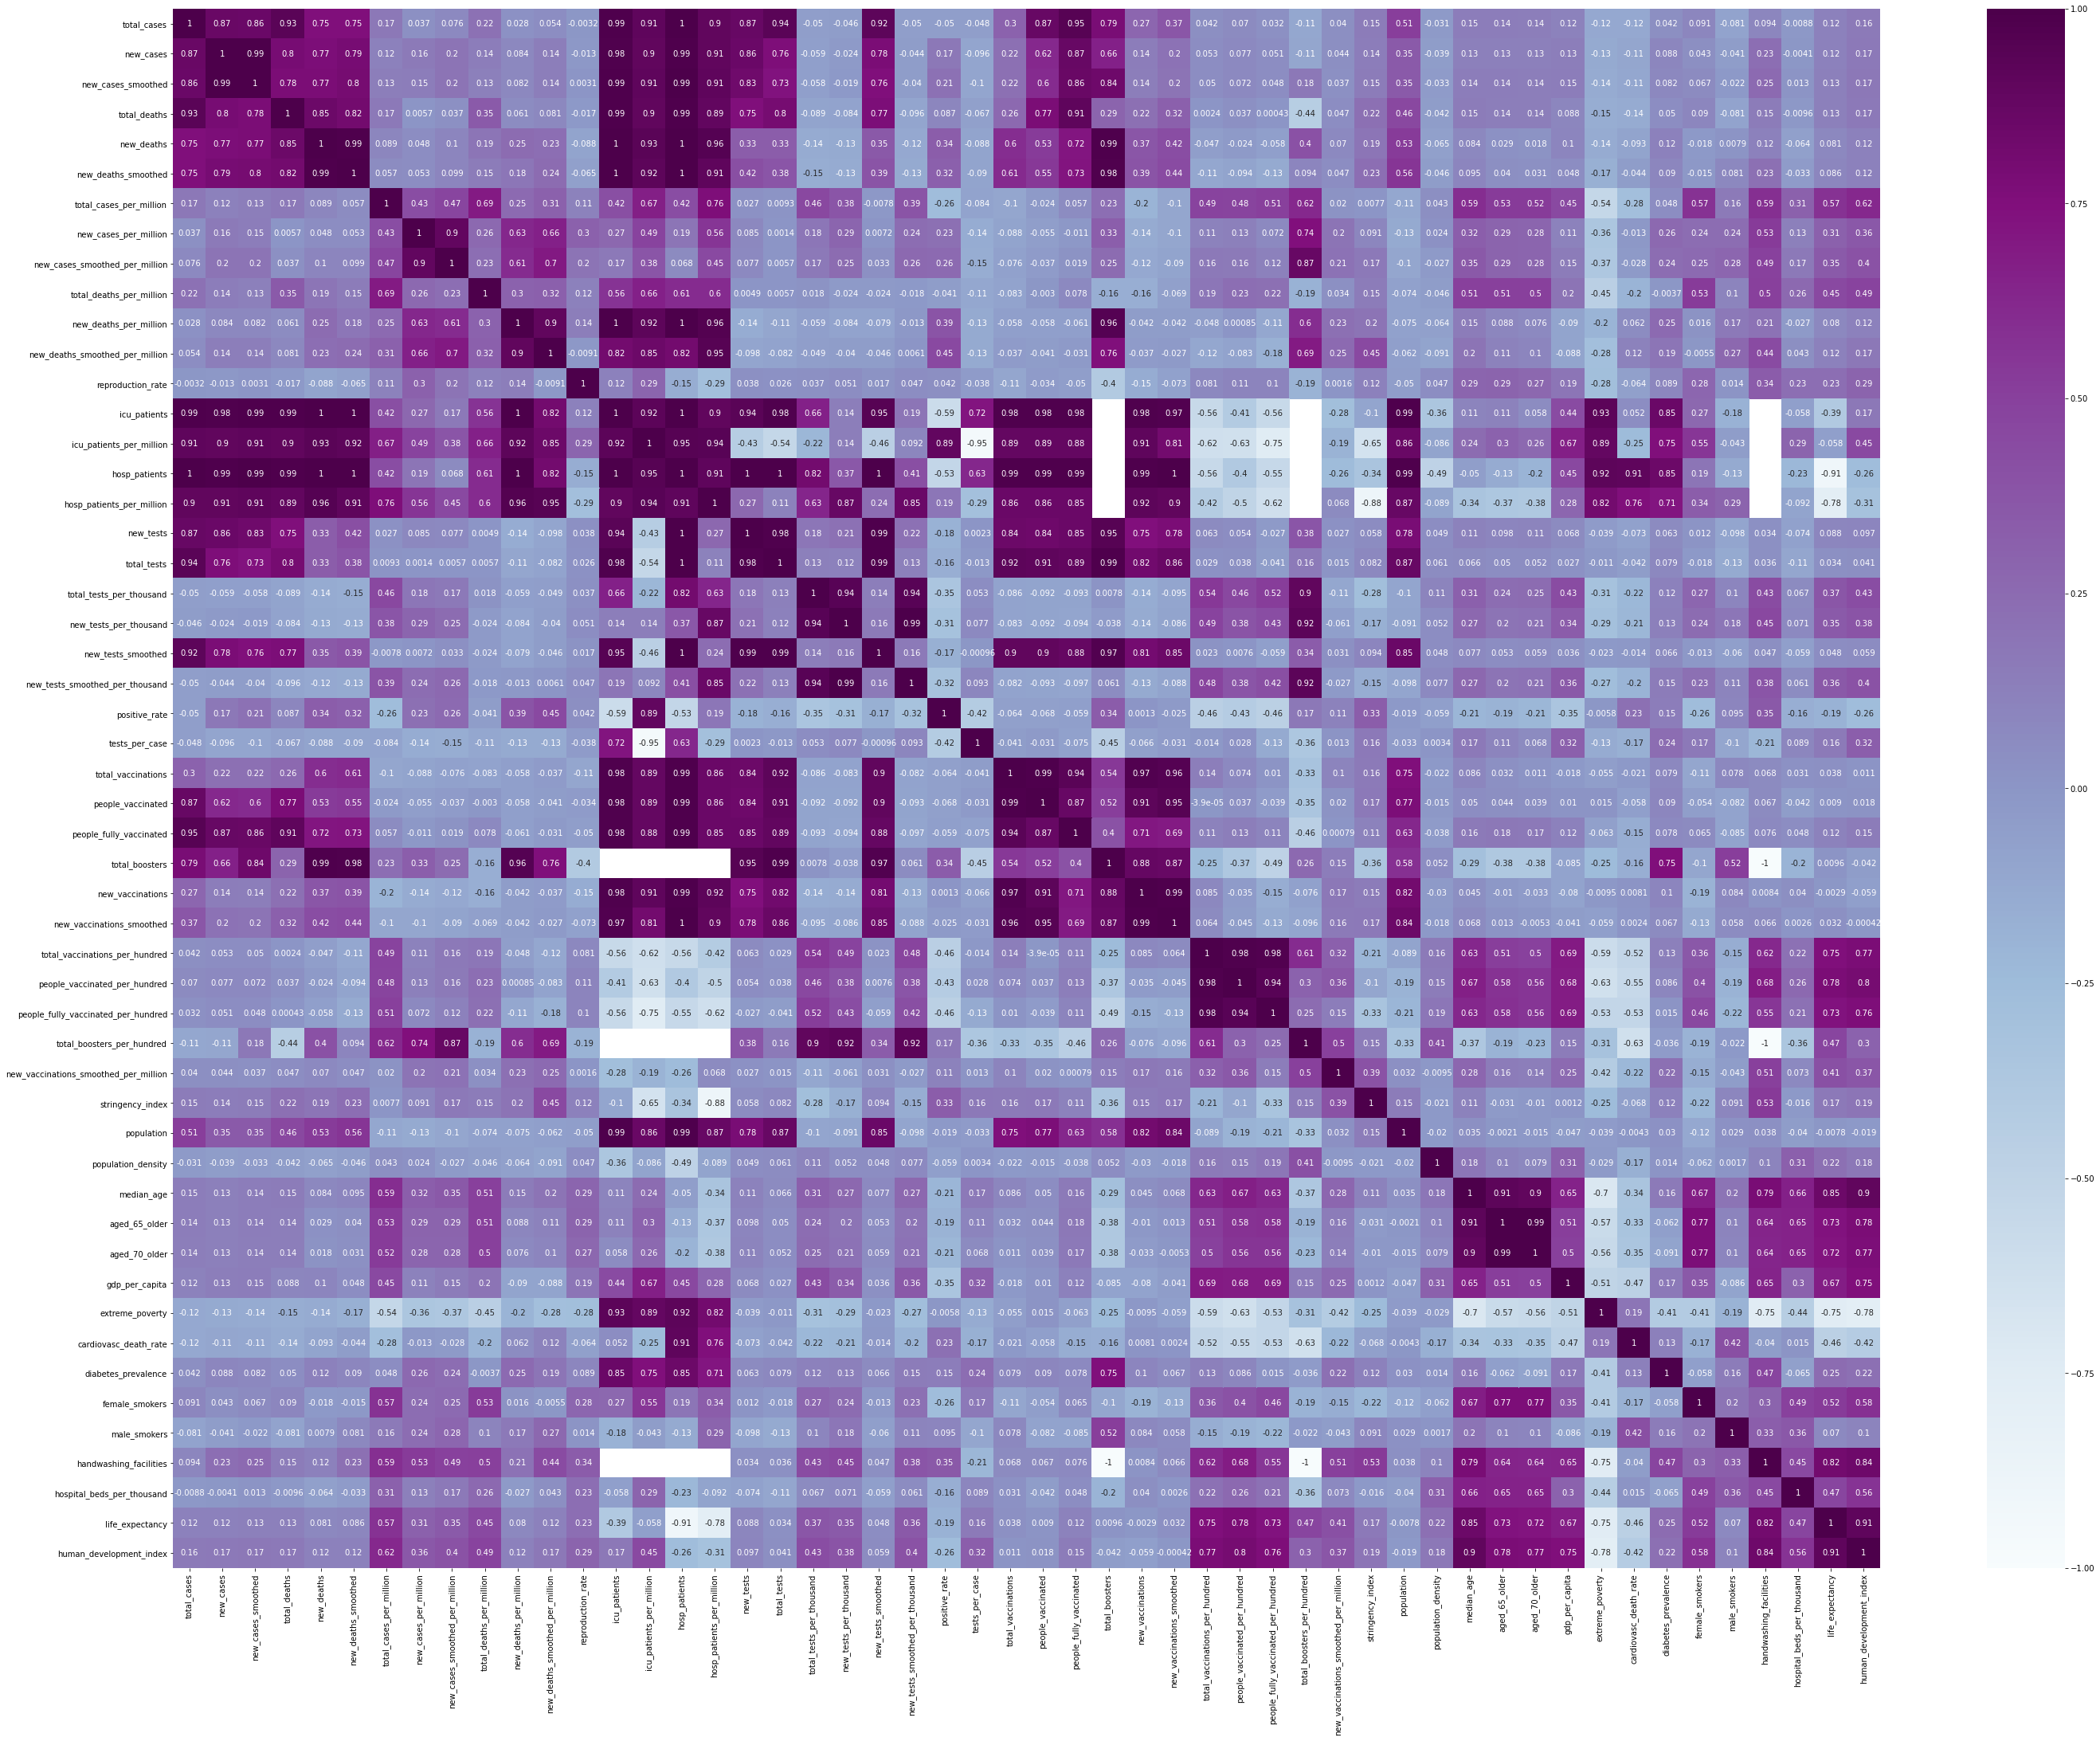

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt 
# Displaying dataframe as an heatmap 
fig, ax = plt.subplots(figsize=(48,36))
sns.heatmap(filtered_df.corr(), center=0, cmap='BuPu', annot=True)
plt.savefig('covid.png')

In [47]:
# Drop unecessary columns
filtered_df.drop(['new_cases_smoothed','new_deaths_smoothed','new_cases_smoothed_per_million','new_deaths_smoothed_per_million'
                 , 'new_tests_smoothed','new_tests_smoothed_per_thousand','total_boosters','new_vaccinations_smoothed'
                 , 'total_boosters_per_hundred','new_vaccinations_smoothed_per_million'],axis=1, inplace=True)
filtered_df

C:\Users\OG.000\.conda\envs\mlenv\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,reproduction_rate,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,Afghanistan,153220.0,72.0,7118.0,2.0,3846.325,1.807,178.685,0.050,0.63,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.511
1,Africa,7790394.0,22708.0,196278.0,779.0,5671.985,16.533,142.905,0.567,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,146387.0,1054.0,2498.0,3.0,50953.833,366.872,869.494,1.044,1.28,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795
3,Algeria,196080.0,506.0,5269.0,29.0,4394.774,11.341,118.095,0.650,0.79,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.748
4,Andorra,15033.0,1.0,130.0,NaN,194340.306,12.928,1680.585,NaN,0.71,...,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Venezuela,334343.0,NaN,4010.0,NaN,11647.574,NaN,139.697,NaN,1.01,...,16745.022,NaN,204.850,6.47,NaN,NaN,NaN,0.80,72.06,0.711
189,Vietnam,462096.0,12607.0,11064.0,NaN,4707.156,128.422,112.704,NaN,1.10,...,6171.884,2.0,245.465,6.00,1.0,45.9,85.847,2.60,75.40,0.704
190,Yemen,7869.0,40.0,1472.0,3.0,258.079,1.312,48.277,0.098,1.31,...,1479.147,18.8,495.003,5.35,7.6,29.2,49.542,0.70,66.12,0.470
191,Zambia,206327.0,182.0,3602.0,3.0,10904.854,9.619,190.374,0.159,0.72,...,3689.251,57.5,234.499,3.94,3.1,24.7,13.938,2.00,63.89,0.584


In [48]:
filtered_df.nunique()

location                               193
total_cases                            192
new_cases                              150
total_deaths                           183
new_deaths                              59
total_cases_per_million                193
new_cases_per_million                  163
total_deaths_per_million               188
new_deaths_per_million                 130
reproduction_rate                       94
icu_patients                             6
icu_patients_per_million                 6
hosp_patients                            5
hosp_patients_per_million                5
new_tests                               79
total_tests                             83
total_tests_per_thousand                83
new_tests_per_thousand                  78
positive_rate                           74
tests_per_case                          85
tests_units                              4
total_vaccinations                     113
people_vaccinated                      108
people_full

In [49]:
# Drop more unecessary columns
filtered_df.drop(['icu_patients','icu_patients_per_million','hosp_patients','hosp_patients_per_million'
                 ,'tests_units',],axis=1, inplace=True)
filtered_df

C:\Users\OG.000\.conda\envs\mlenv\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,reproduction_rate,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,Afghanistan,153220.0,72.0,7118.0,2.0,3846.325,1.807,178.685,0.050,0.63,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.511
1,Africa,7790394.0,22708.0,196278.0,779.0,5671.985,16.533,142.905,0.567,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,146387.0,1054.0,2498.0,3.0,50953.833,366.872,869.494,1.044,1.28,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795
3,Algeria,196080.0,506.0,5269.0,29.0,4394.774,11.341,118.095,0.650,0.79,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.748
4,Andorra,15033.0,1.0,130.0,NaN,194340.306,12.928,1680.585,NaN,0.71,...,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Venezuela,334343.0,NaN,4010.0,NaN,11647.574,NaN,139.697,NaN,1.01,...,16745.022,NaN,204.850,6.47,NaN,NaN,NaN,0.80,72.06,0.711
189,Vietnam,462096.0,12607.0,11064.0,NaN,4707.156,128.422,112.704,NaN,1.10,...,6171.884,2.0,245.465,6.00,1.0,45.9,85.847,2.60,75.40,0.704
190,Yemen,7869.0,40.0,1472.0,3.0,258.079,1.312,48.277,0.098,1.31,...,1479.147,18.8,495.003,5.35,7.6,29.2,49.542,0.70,66.12,0.470
191,Zambia,206327.0,182.0,3602.0,3.0,10904.854,9.619,190.374,0.159,0.72,...,3689.251,57.5,234.499,3.94,3.1,24.7,13.938,2.00,63.89,0.584


In [50]:
filtered_df.nunique()

location                               193
total_cases                            192
new_cases                              150
total_deaths                           183
new_deaths                              59
total_cases_per_million                193
new_cases_per_million                  163
total_deaths_per_million               188
new_deaths_per_million                 130
reproduction_rate                       94
new_tests                               79
total_tests                             83
total_tests_per_thousand                83
new_tests_per_thousand                  78
positive_rate                           74
tests_per_case                          85
total_vaccinations                     113
people_vaccinated                      108
people_fully_vaccinated                107
new_vaccinations                        84
total_vaccinations_per_hundred         113
people_vaccinated_per_hundred          108
people_fully_vaccinated_per_hundred    105
stringency_

In [67]:
final_df = filtered_df.drop([ 'total_tests_per_thousand','new_tests_per_thousand','new_tests','total_tests','new_deaths_per_million','new_cases_per_million','new_vaccinations','stringency_index','new_cases','new_deaths'],axis = 1)

In [68]:
final_df

,location,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,reproduction_rate,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,Afghanistan,153220.0,7118.0,3846.325,178.685,0.63,NaN,NaN,1979652.0,773002.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.511
1,Africa,7790394.0,196278.0,5671.985,142.905,NaN,NaN,NaN,103848842.0,68875046.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,146387.0,2498.0,50953.833,869.494,1.28,NaN,NaN,1472316.0,830396.0,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795
3,Algeria,196080.0,5269.0,4394.774,118.095,0.79,NaN,NaN,NaN,NaN,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.748
4,Andorra,15033.0,130.0,194340.306,1680.585,0.71,NaN,NaN,NaN,NaN,...,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Venezuela,334343.0,4010.0,11647.574,139.697,1.01,NaN,NaN,NaN,NaN,...,16745.022,NaN,204.850,6.47,NaN,NaN,NaN,0.80,72.06,0.711
189,Vietnam,462096.0,11064.0,4707.156,112.704,1.10,0.071,14.2,19966724.0,17347538.0,...,6171.884,2.0,245.465,6.00,1.0,45.9,85.847,2.60,75.40,0.704
190,Yemen,7869.0,1472.0,258.079,48.277,1.31,NaN,NaN,NaN,NaN,...,1479.147,18.8,495.003,5.35,7.6,29.2,49.542,0.70,66.12,0.470
191,Zambia,206327.0,3602.0,10904.854,190.374,0.72,0.032,30.9,NaN,NaN,...,3689.251,57.5,234.499,3.94,3.1,24.7,13.938,2.00,63.89,0.584


In [25]:
final_df.to_csv("owid-covid-data_filtered.csv")

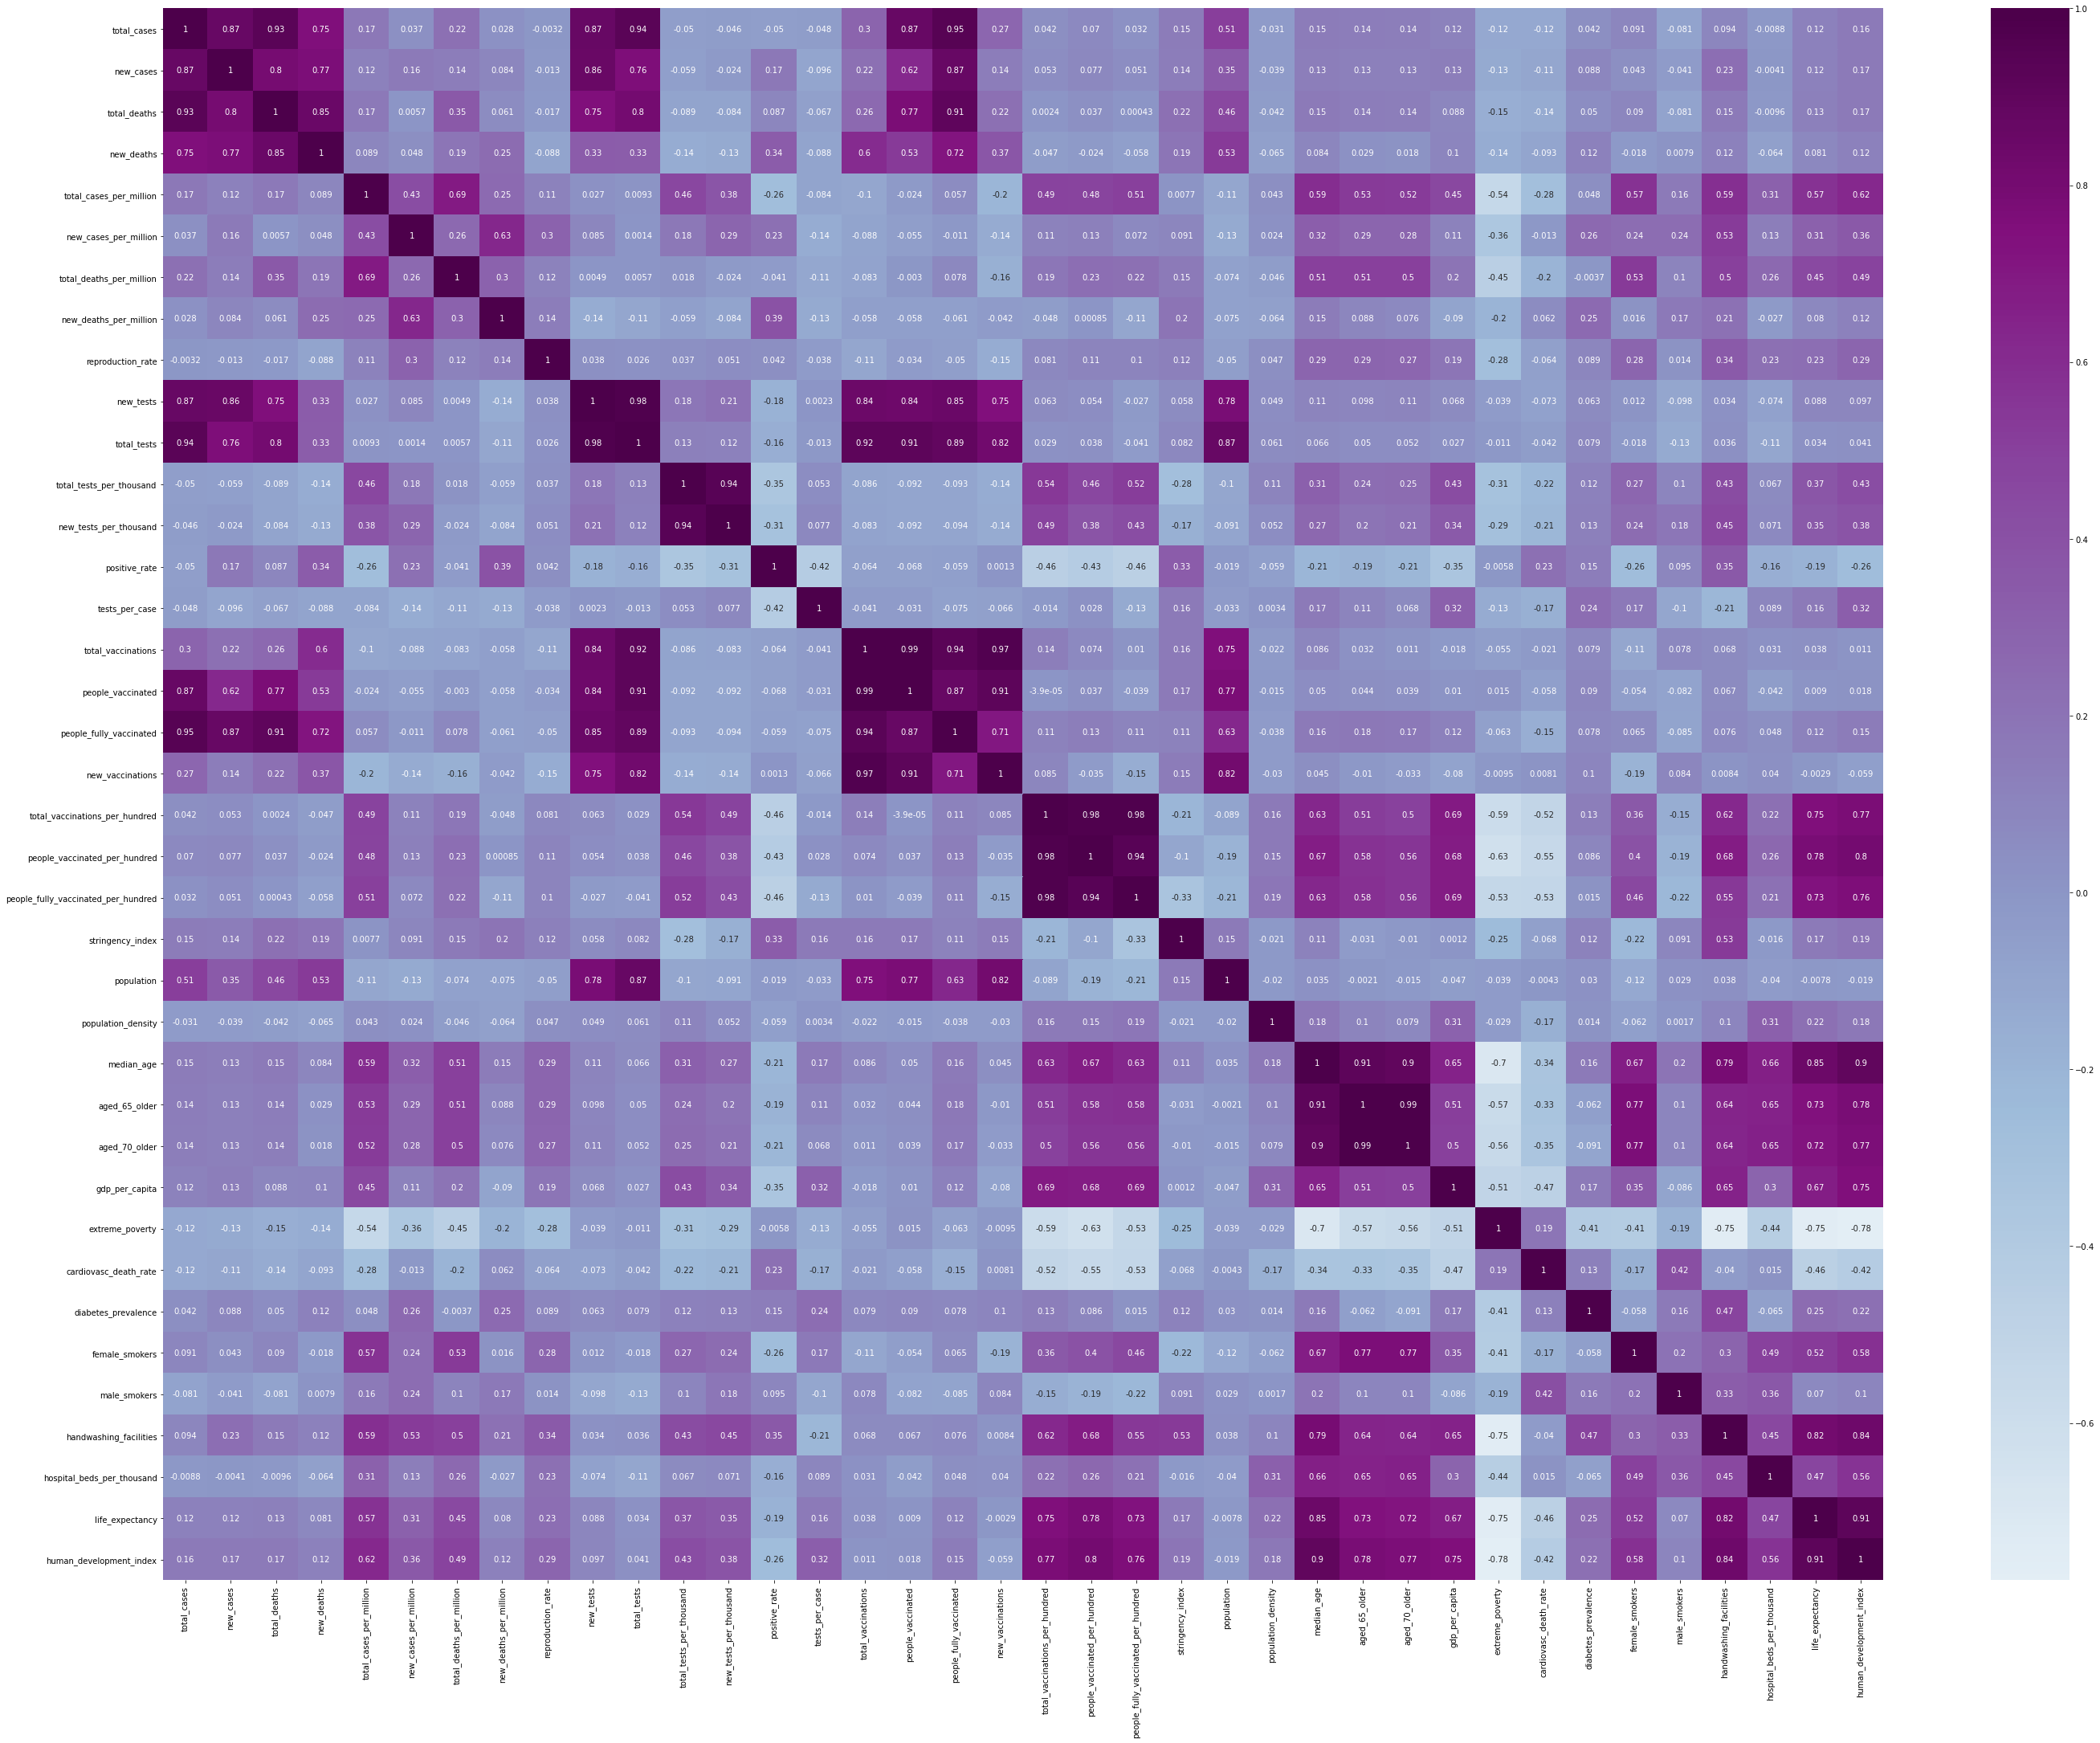

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt 
# Displaying dataframe as an heatmap 
fig, ax = plt.subplots(figsize=(48,36))
sns.heatmap(filtered_df.corr(), center=0, cmap='BuPu', annot=True)
plt.savefig('covid_filtered.png')